<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [ ]:
# Technical exercise, Garbage analysis 

In [121]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [63]:
satspath='../project-two/sat_scores.csv'
sats = pd.read_csv(satspath)
# print sats.shape
sats.shape

(52, 4)

 sats.head(6)

In [66]:
sats.head(6)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [67]:
sats.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [68]:
# Reading in the local file 'housing.data'
datasats = []
with open('../project-two/sat_scores.csv', 'r') as f:
    rows = f.readlines()
#     print(rows)
    for row in rows:
        datasats.append(row)
f.close()

# datasats


In [72]:
newrows = []
for k in rows:
    k = k.replace('\n','')
    newrows.append(k)
newrows
newrows[0]

'State,Rate,Verbal,Math'

In [71]:
satshead=[]
satshead=[newrows[0]]
# satshead

satsdata=[]
satsdata=newrows[1:]
satshead, satsdata[0:5]

([['CT', '82', '509', '510']],
 [['NJ', '81', '499', '513'],
  ['MA', '79', '511', '515'],
  ['NY', '77', '495', '505'],
  ['NH', '72', '520', '516'],
  ['RI', '71', '501', '499']])

In [77]:
# for v in satshead:
#     v=v.split(',')
#     print v
#     newsatshead=v

# newsatshead

# newrows = []
# for k in satsdata:
#     k=k.split(',')
#     newrows.append(k)
# newrows
# newsatsdata=newrows

In [78]:
newsatshead

['State', 'Rate', 'Verbal', 'Math']

In [11]:
newsatsdata

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [79]:
sats.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [80]:
with open('out.txt', 'w') as f:
    print >> f, 'Data types'  # Python 2.x
    print>> f, sats.dtypes,'shape',sats.shape
    
Datadict = []
with open('./out.txt', 'r') as f:
    rows = f.readlines()
#     print(rows)
    for row in rows:
        Datadict.append(row)
f.close()
Datadict

['Data types\n',
 'State     object\n',
 'Rate       int64\n',
 'Verbal     int64\n',
 'Math       int64\n',
 'dtype: object shape (52, 4)\n']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

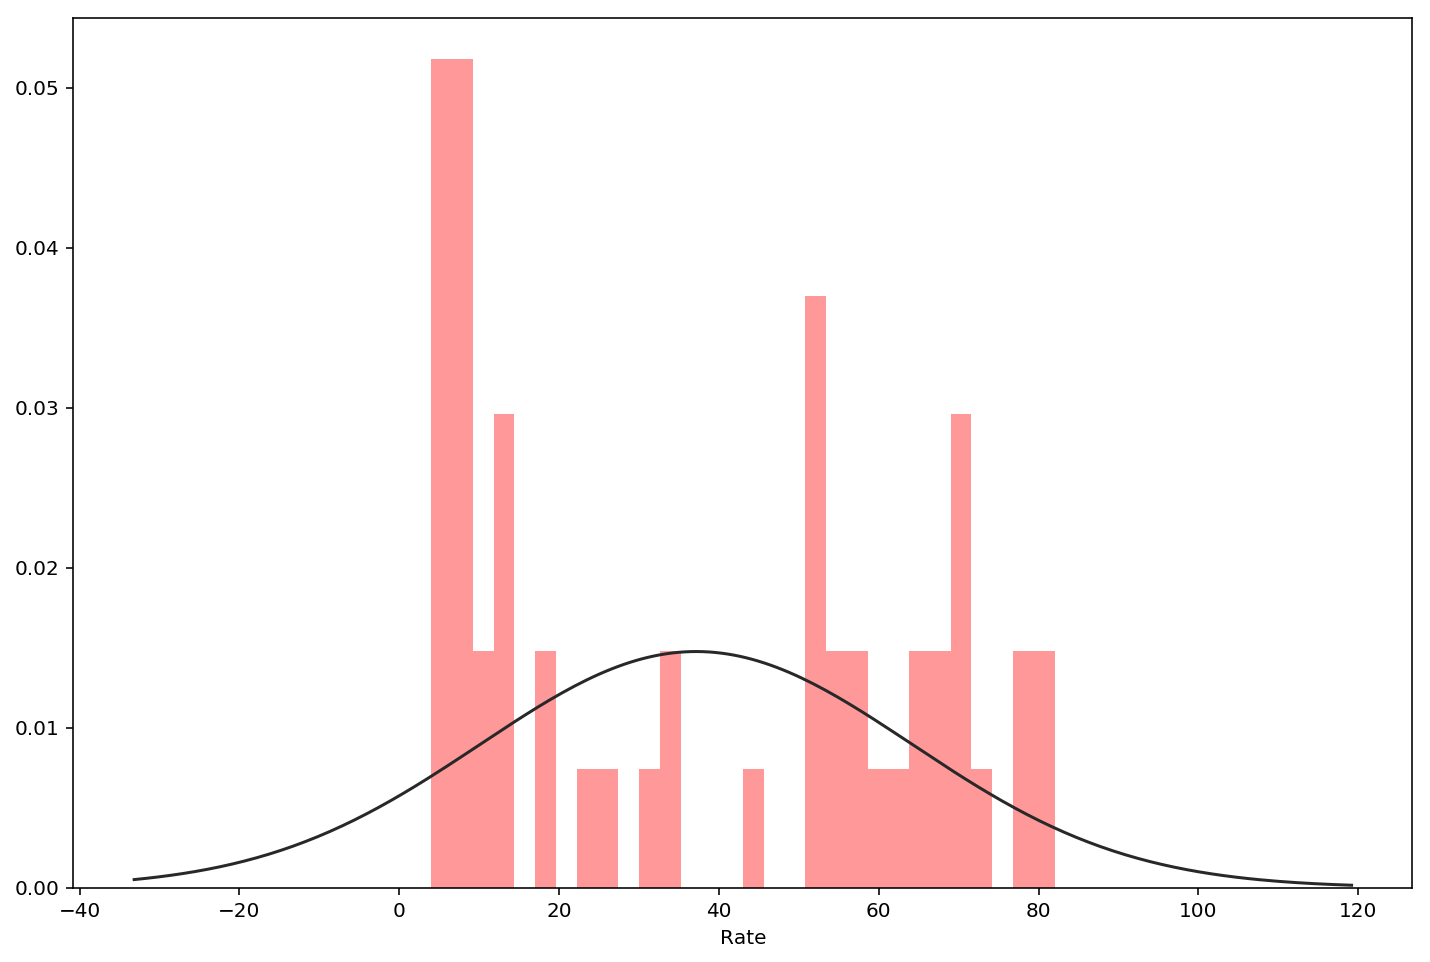

In [96]:
import seaborn as sns
from scipy.stats import norm

# plot histogram with  a normalised fit graph

# ax = sns.distplot(sats.Verbal), rug=True, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3,
#                              "alpha": 1, "color": "g"})

# ax = sns.distplot(sats.Rate, fit=norm, kde=False,vertical=True,color='y')

ax = sns.distplot(sats.Rate, fit=norm, kde=False,vertical=False,color='r',bins=30)

ax.figure.set_size_inches(12,8)
# Set the Title of the graph from here

# ax.axes.set_title('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)
# # Set the xlabel of the graph from here
# g.set_xlabel("Tip",size = 67,color="r",alpha=0.5)
# # Set the ylabel of the graph from here
# g.set_ylabel("Total Bill",size = 67,color="r",alpha=0.5)
# # Set the ticklabel size and color of the graph from here
# g.tick_params(labelsize=14,labelcolor="black")

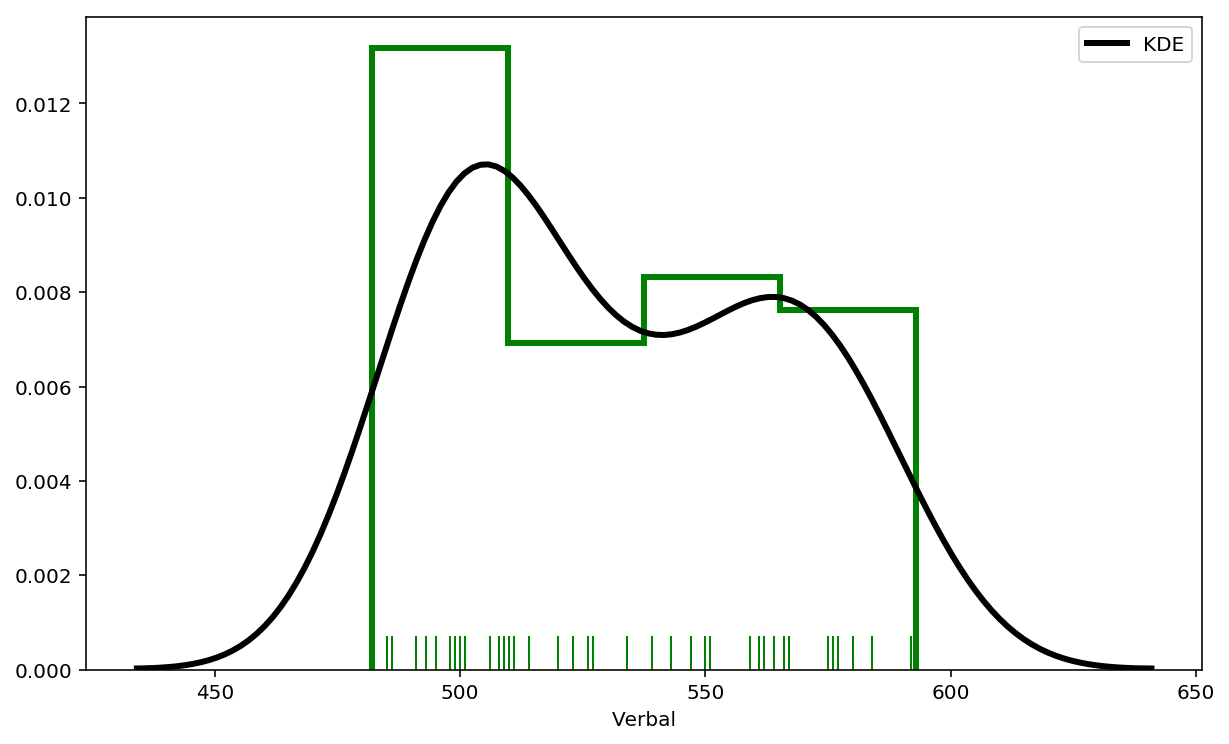

In [82]:
ax1 = sns.distplot(sats.Verbal, rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"}, \
                   hist_kws={"histtype": "step", "linewidth": 3, \
                            "alpha": 1, "color": "g"})

ax1.figure.set_size_inches(10,6)

# kde : bool, optional -Whether to plot a gaussian kernel density estimate.

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

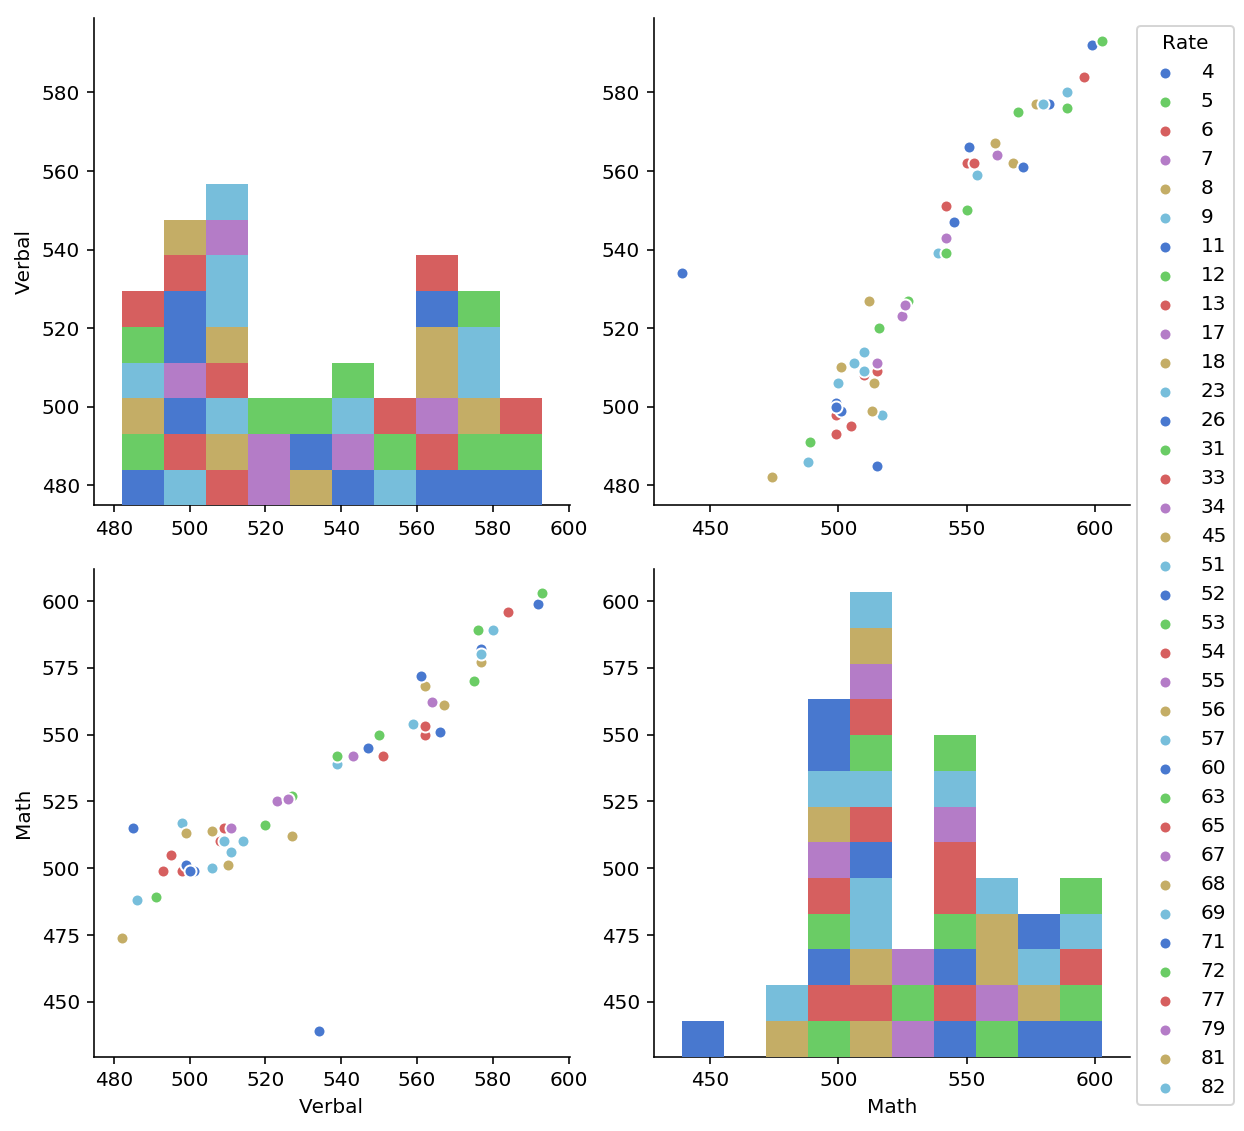

In [93]:
g = sns.pairplot(sats,hue="Rate",palette="muted",size=4,
    vars=["Verbal", "Math"],kind='scatter')



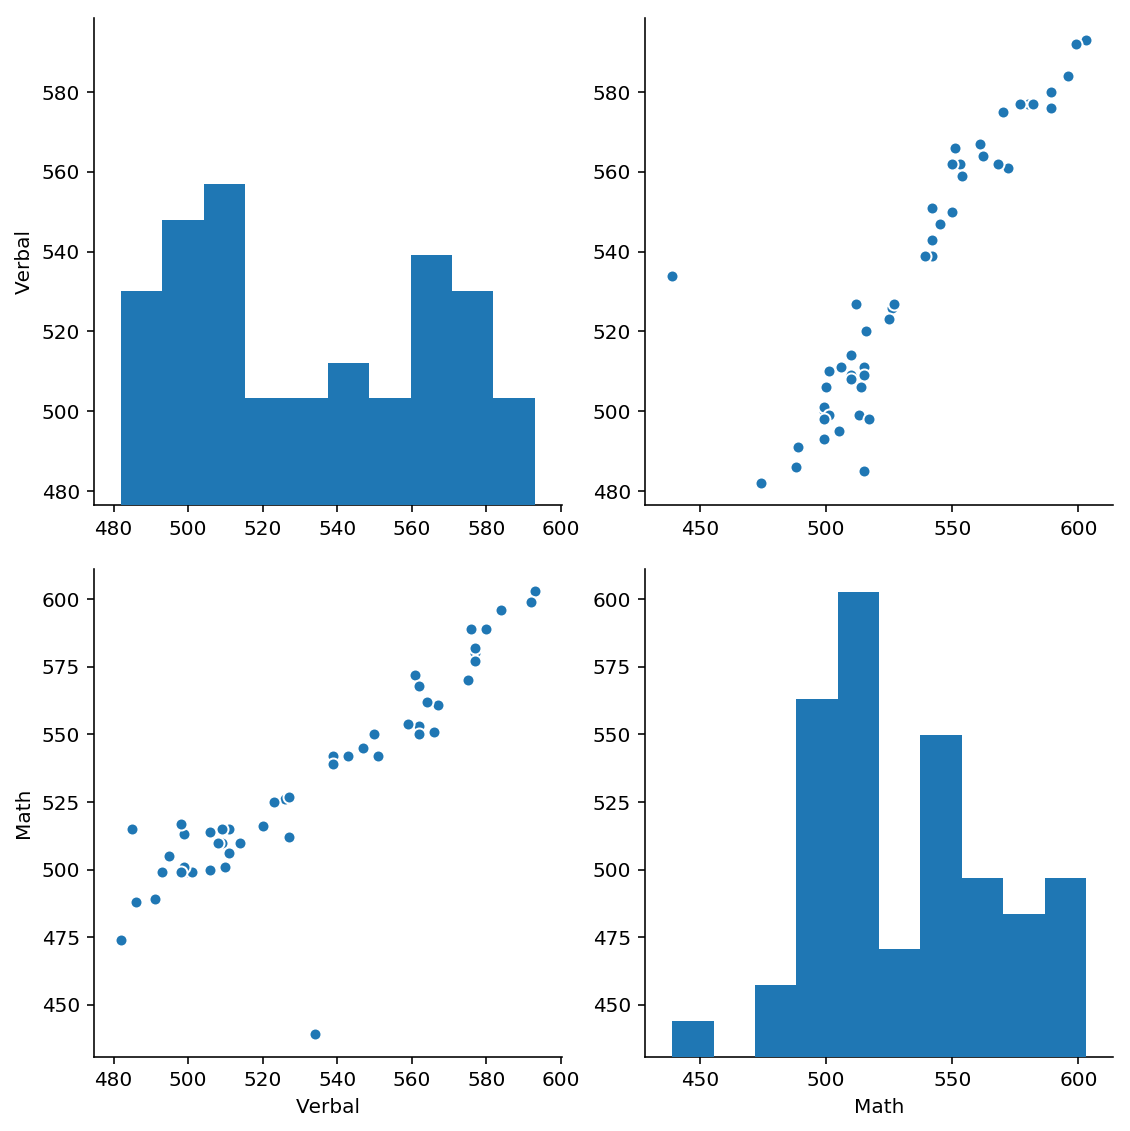

In [175]:
g = sns.pairplot(sats,palette="muted",size=4,
    vars=["Verbal", "Math"],kind='scatter')

# g = sns.pairplot(sats,hue="Rate",palette="muted",size=4,
#     vars=["Verbal", "Math"],kind='scatter')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

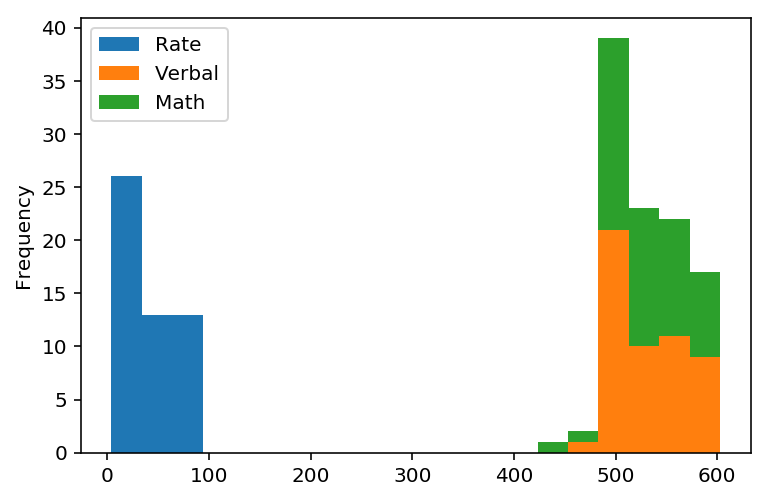

In [85]:
plt.figure();

sats.plot.hist(stacked=True, bins=20)

# sats.Rate.plot.hist(stacked=True, bins=20)

In [138]:
sats.head(3)

,State,Rate,Verbal,Math,ver_mean,ver_mean2
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

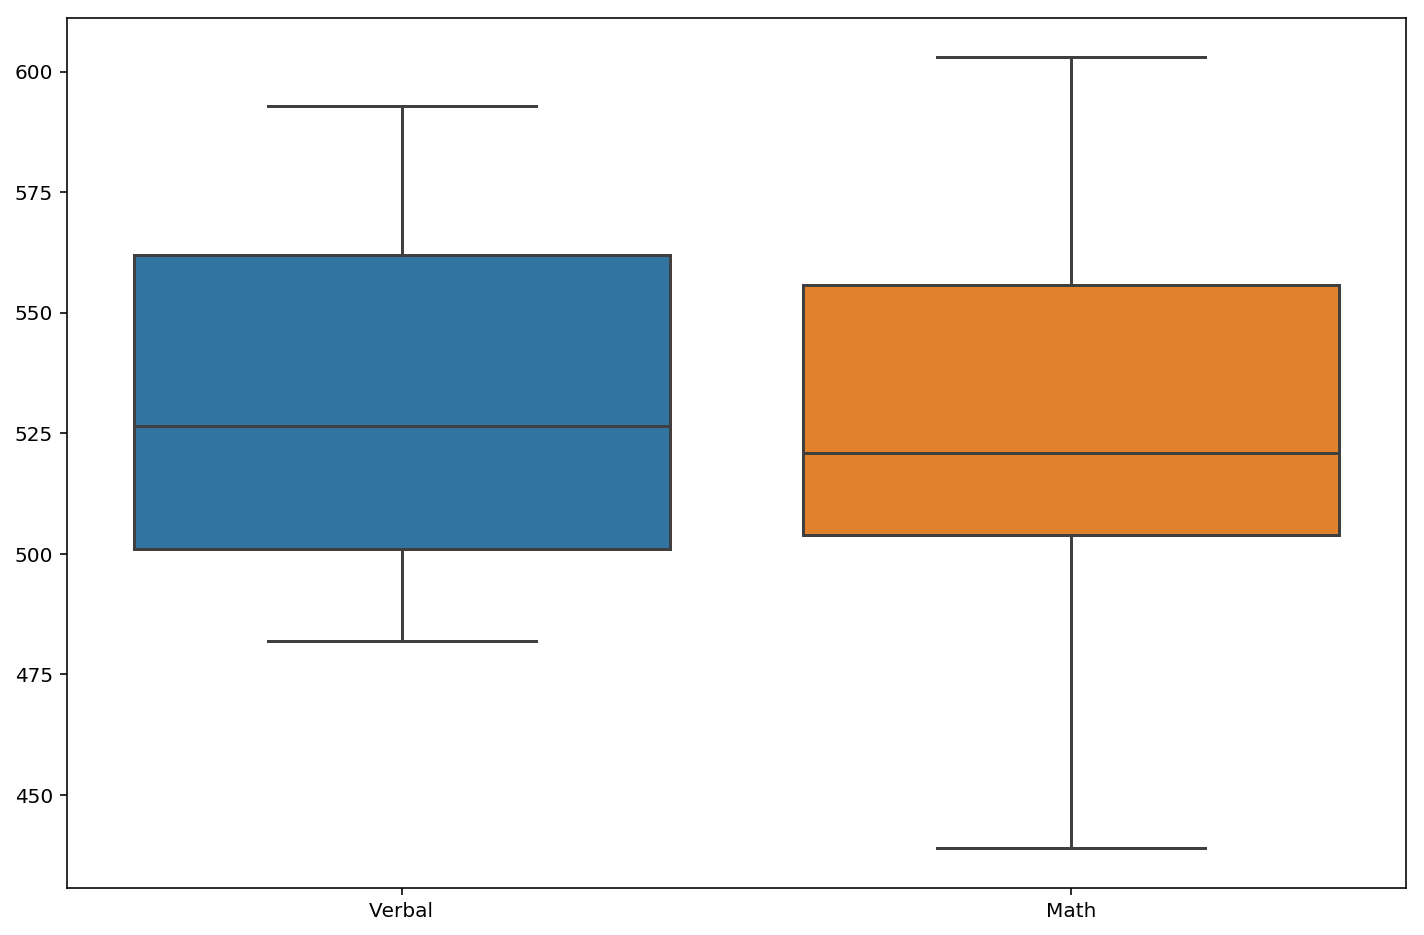

In [140]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot( data=sats[['Verbal','Math']])
# 'Verbal','Math'
# plt.setp(ax,yticks=[500,600]) 

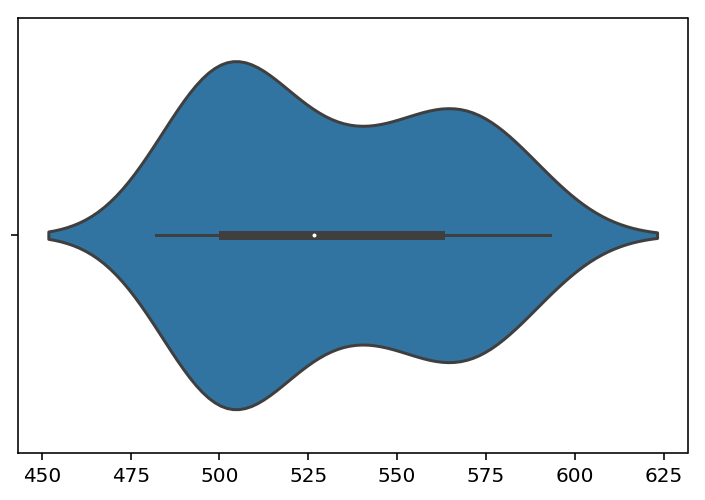

In [141]:
# sns.violinplot([sats.Verbal, sats.Math])

sns.violinplot([sats.Verbal])

# sns.violinplot(x="Rate",  y="Math", hue="Verbal", data=sats)

# Violin plots are similar to box plots, except that they also show the probability density of the data at different values 
# (in the simplest case this could be a histogram)

# A violin plot has four layers. The outer shape represents all possible results, with thickness indicating how common.
# (Thus the thickest section represents the mode average.) 
# The next layer inside represents the values that occur 95% of the time. The next layer (if it exists) inside represents the values that occur 50% of the time. 
# The central dot represents the median average value.

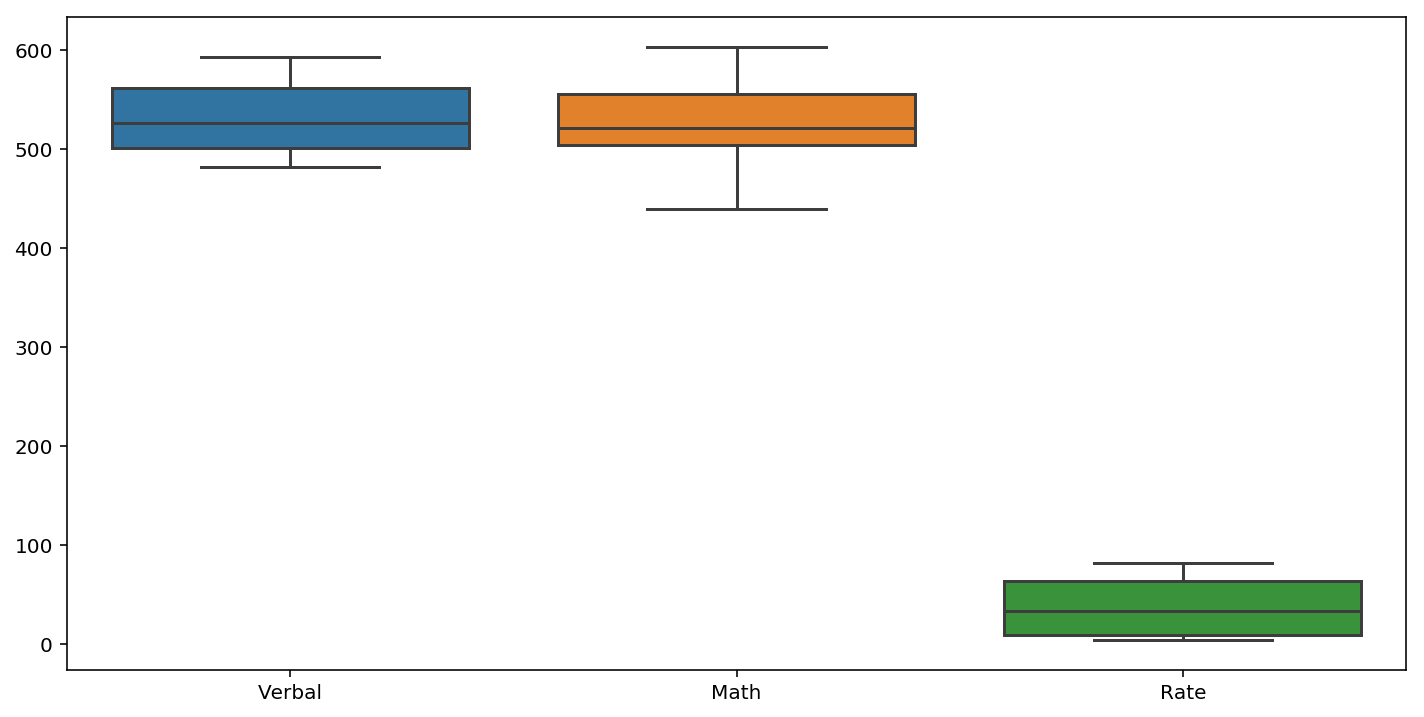

In [180]:
# What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=sats[['Verbal','Math','Rate']])
# sns.boxplot('Rate', data=sats)
# ax.set(xlabel='Rate', ylabel='Math')
# ax.set_rotation(45)

In [ ]:
What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal
# difficult to read  due to scale differences 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [226]:
sats.head(5)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [101]:
# Get mean of Verbal
verbalmean=np.mean(sats.Verbal)
verbalmean

532.0192307692307

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [252]:
sats[sats['Verbal'] > verbalmean]



,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [314]:
difflist=[]
difflist.append([sats['Verbal']-sats['Math']])


d = {'Ver-Mean':difflist[0]}

print d


{'Ver-Mean': [0     -1
1    -14
2     -4
3    -10
4      4
5      2
6      1
7      5
8      6
9      9
10     2
11    -2
12    -6
13     2
14    -2
15    -2
16     8
17     0
18    -1
19     0
20    -6
21   -30
22     4
23   -19
24    -2
25    -6
26    -3
27    95
28     0
29    15
30     1
31     9
32     9
33   -13
34     0
35     2
36   -11
37    -9
38    -3
39     5
40    -6
41     6
42     0
43     2
44   -12
45    12
46     5
47   -10
48    -5
49    -7
50    15
51    -8
dtype: int64]}


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [102]:
# df = pd.DataFrame([[1, 2], [3, 4], [5,6]], columns=list('AB'))

# df['elderly'] = np.where(df['age']>=50, 'yes', 'no')

satsnew=sats

# satsnew

satsnew['ver_mean'] = np.where((sats['Verbal']-sats['Math'])>=verbalmean,0,sats['Verbal']-sats['Math'])

satsnew.sort_values('ver_mean',ascending=False).head(3) 

,State,Rate,Verbal,Math,ver_mean
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [103]:
satsnew['ver_mean2'] = np.where((sats['Math']-sats['Verbal'])>=verbalmean,0,sats['Math']-sats['Verbal'])

satsnew.sort_values('ver_mean2',ascending=False).head(3) 

,State,Rate,Verbal,Math,ver_mean,ver_mean2
21,HI,52,485,515,-30,30
23,CA,51,498,517,-19,19
1,NJ,81,499,513,-14,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [106]:
# # plt.matshow(satsnew.corr())

# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(satsnew, interpolation='nearest')
# fig.colorbar(cax)

# # ax.set_xticklabels(['']+alpha)
# # ax.set_yticklabels(['']+alpha)

# plt.show()

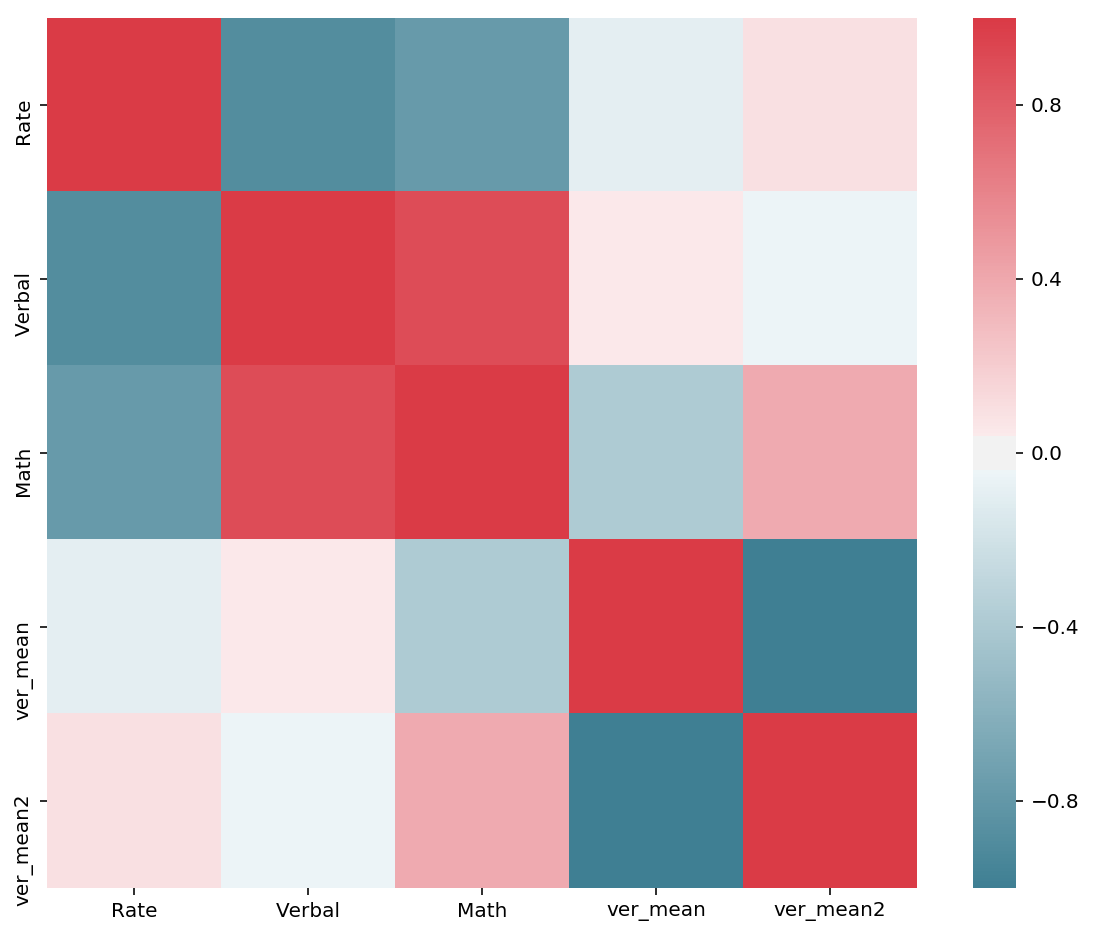

In [334]:
f, ax = plt.subplots(figsize=(10, 8))
corr = satsnew.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
there is a high negative correlation between rate and verbal and low correlation between Rate and Math 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [336]:
print satsnew.describe

<bound method DataFrame.describe of    State  Rate  Verbal  Math  ver_mean  ver_mean2
0     CT    82     509   510        -1          1
1     NJ    81     499   513       -14         14
2     MA    79     511   515        -4          4
3     NY    77     495   505       -10         10
4     NH    72     520   516         4         -4
5     RI    71     501   499         2         -2
6     PA    71     500   499         1         -1
7     VT    69     511   506         5         -5
8     ME    69     506   500         6         -6
9     VA    68     510   501         9         -9
10    DE    67     501   499         2         -2
11    MD    65     508   510        -2          2
12    NC    65     493   499        -6          6
13    GA    63     491   489         2         -2
14    IN    60     499   501        -2          2
15    SC    57     486   488        -2          2
16    DC    56     482   474         8         -8
17    OR    55     526   526         0          0
18    FL    54

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [337]:
print(satsnew.cov())

# covariance is a measure of the variability of two random variables.

# Correlation shows a relationship between two variables in formula but is normalised between -1 to 1
# On the other hand, covariance is when two items vary together but the relationship may not be quantitatively established and the scale may vary. 
# This makes it difficult to interpret and explain

# To convert correlation to  covariance
# Rescale the correlation matrix by pre- and post-multiplying by a diagonal matrix that contains the standard deviations

                 Rate       Verbal         Math    ver_mean   ver_mean2
Rate       745.387632  -804.355958  -760.803922  -43.552036   43.552036
Verbal    -804.355958  1104.646682  1077.147059   27.499623  -27.499623
Math      -760.803922  1077.147059  1297.078431 -219.931373  219.931373
ver_mean   -43.552036    27.499623  -219.931373  247.430995 -247.430995
ver_mean2   43.552036   -27.499623   219.931373 -247.430995  247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [219]:
drugpath='../project-two/drug-use-by-age.csv'
drugs = pd.read_csv(drugpath)
drugs.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [220]:
print drugs

      age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [37]:
drugs.describe
# age is mixture of ranges and discrete values
# missing data such as in crack frequency 

# subsets are type of drugs (medical non medical) , alcohol and frequency of usage
# data could be grouped by age groups instead of discrete values 


<bound method DataFrame.describe of       age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5            

In [41]:
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [38]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [ ]:
# There a higher frequency of  alochol and marijuana usage  across age groups ?

# There is higher frequency of usage between medical related drugs vs non medical drugs between age groups



** Question and deliverables**


...

In [2]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [163]:
sats.sort_values('Rate')

satsrate=[sats[('Rate')]]

satsrateval=sats[('Rate')]

In [164]:
#get Rate in numeric Integer type
satsrateint = pd.to_numeric(satsrateval, errors='coerce')

satsrateint

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [173]:
#outliers = 3 SD away from mean

Out=pd.Series(satsrateint)
Outliers=Out[~((Out-Out.mean()).abs()>3*Out.std())]

for i in Out:
    print 'mean',Out-Out.mean(),'sd', 3*Out.std()
    


mean 0     44.846154
1     43.846154
2     41.846154
3     39.846154
4     34.846154
5     33.846154
6     33.846154
7     31.846154
8     31.846154
9     30.846154
10    29.846154
11    27.846154
12    27.846154
13    25.846154
14    22.846154
15    19.846154
16    18.846154
17    17.846154
18    16.846154
19    15.846154
20    15.846154
21    14.846154
22    13.846154
23    13.846154
24    -3.153846
25    -4.153846
26    -6.153846
27   -11.153846
28   -14.153846
29   -19.153846
30   -20.153846
31   -24.153846
32   -24.153846
33   -25.153846
34   -25.153846
35   -26.153846
36   -26.153846
37   -28.153846
38   -28.153846
39   -28.153846
40   -29.153846
41   -29.153846
42   -29.153846
43   -30.153846
44   -31.153846
45   -31.153846
46   -32.153846
47   -32.153846
48   -33.153846
49   -33.153846
50   -33.153846
51     7.846154
Name: Rate, dtype: float64 sd 81.9053642186
mean 0     44.846154
1     43.846154
2     41.846154
3     39.846154
4     34.846154
5     33.846154
6     33.846154
7 

Name: Rate, dtype: float64 sd 81.9053642186
mean 0     44.846154
1     43.846154
2     41.846154
3     39.846154
4     34.846154
5     33.846154
6     33.846154
7     31.846154
8     31.846154
9     30.846154
10    29.846154
11    27.846154
12    27.846154
13    25.846154
14    22.846154
15    19.846154
16    18.846154
17    17.846154
18    16.846154
19    15.846154
20    15.846154
21    14.846154
22    13.846154
23    13.846154
24    -3.153846
25    -4.153846
26    -6.153846
27   -11.153846
28   -14.153846
29   -19.153846
30   -20.153846
31   -24.153846
32   -24.153846
33   -25.153846
34   -25.153846
35   -26.153846
36   -26.153846
37   -28.153846
38   -28.153846
39   -28.153846
40   -29.153846
41   -29.153846
42   -29.153846
43   -30.153846
44   -31.153846
45   -31.153846
46   -32.153846
47   -32.153846
48   -33.153846
49   -33.153846
50   -33.153846
51     7.846154
Name: Rate, dtype: float64 sd 81.9053642186
mean 0     44.846154
1     43.846154
2     41.846154
3     39.846154
4     

![](capture.jpg)

Text(0.5,1,u' Marijuana abuse')

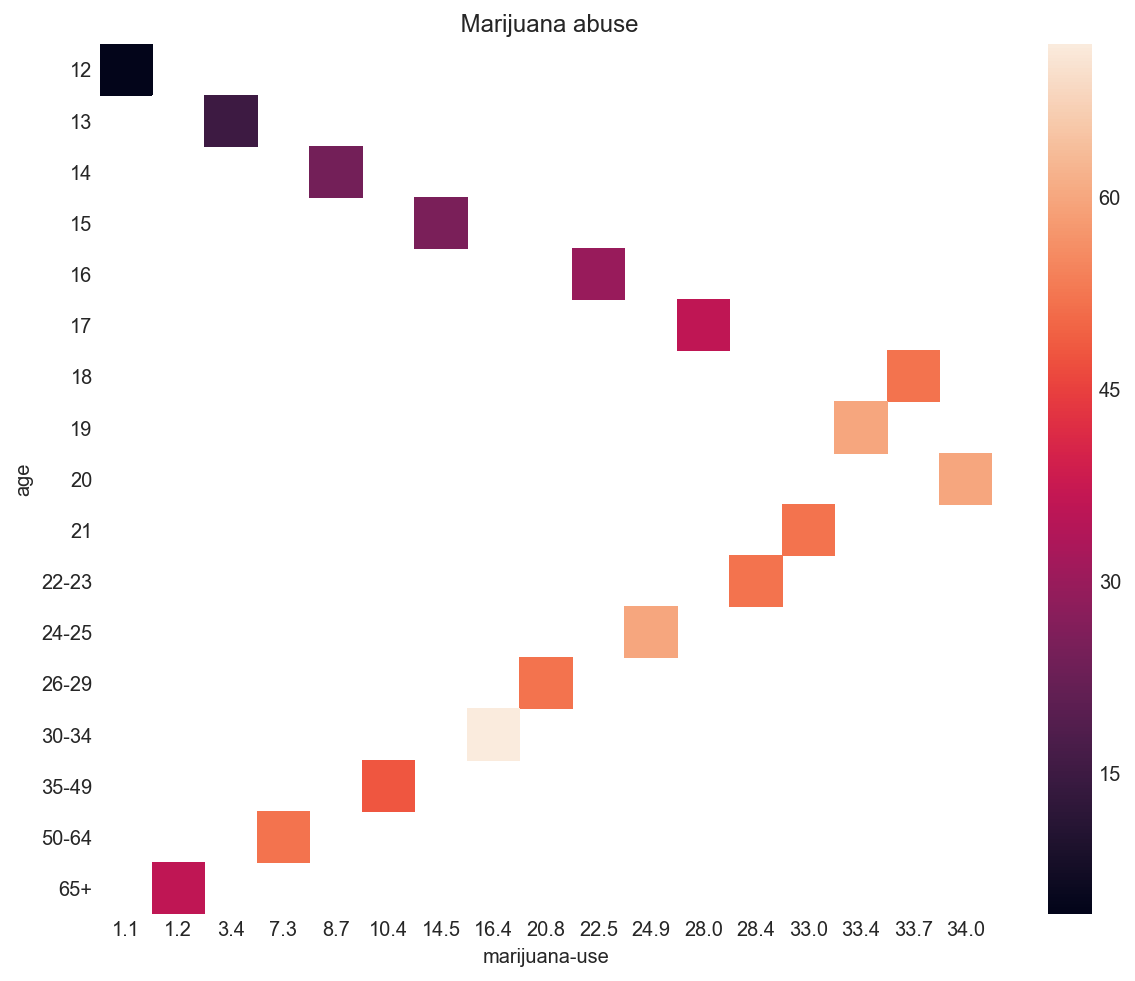

In [241]:
# Heat map
f, ax = plt.subplots(figsize=(10,8))
# sns.set_style("whitegrid")
drugsuse = drugs.pivot("age", "marijuana-use", "marijuana-frequency")
ax = sns.heatmap(drugsuse)
plt.title(' Marijuana abuse')
# plt.ylim(10,100)

Text(0.5,1,u' Marijuana abuse')

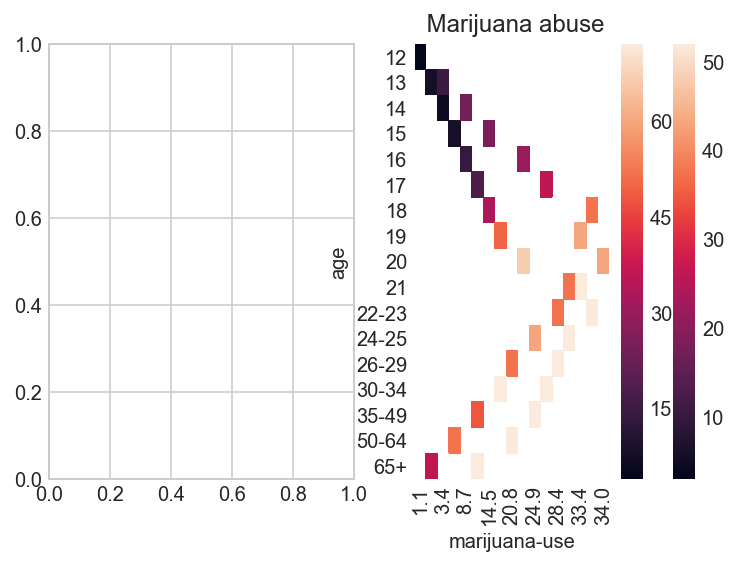

In [240]:

fig, ax = plt.subplots(1, 2)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for i in range(1, 3):

#     if i == 1:
drugsuse1 = drugs.pivot("age", "alcohol-use", "alcohol-frequency")
ax = sns.heatmap(drugsuse1)
plt.title(' Alcohol abuse')
  
drugsuse2 = drugs.pivot("age", "marijuana-use", "marijuana-frequency")
ax = sns.heatmap(drugsuse2)
plt.title(' Marijuana abuse')
    
# drugsuse3 = drugs.pivot("age", "heroin-use", "heroin-frequency")
# ax = sns.heatmap(drugsuse3)
# plt.title(' Heroin abuse')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


![](C:\Users\bless\Pictures\MRT2017.jpg)


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.